<a href="https://colab.research.google.com/github/fianadew/Explanatory-Data-Analysis/blob/main/Happinest_World.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


# **Data Cleaning**



In [3]:
#Tampilkan data
df = pd.read_csv('/content/drive/My Drive/world-happiness-report-2021.csv')
df.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [4]:
#Menghapus kolom yang tidak perlu
dfdrop = df.iloc[:,12:]
df.drop(dfdrop, axis=1, inplace=True)
df.drop(columns=['upperwhisker', 'lowerwhisker','Standard error of ladder score'], inplace=True)
#Add columns rank based on the highest to lowest ladder score
df['rank'] = np.arange(1,len(df)+1)
df.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,rank
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,1
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179,2
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292,3
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673,4
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338,5


In [5]:
#Cek Jumlah Missing Value
df.isnull().sum()

Country name                    0
Regional indicator              0
Ladder score                    0
Logged GDP per capita           0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
rank                            0
dtype: int64

In [6]:
#Cek data duplikat
dfunique = len(set(df.index))
total_dfunique = df.shape[0]
duplikat = total_dfunique - dfunique
duplikat

0

Result of Data Cleaning:
1. Delete columns that no need to analyse. In this analyse i drop columns "Explained by" because columns since these have no direct impact on the total score reported for each country, but instead are just a way of explaining for each country the implications/contribution of these variables to the Ladder Score. The "Explained by: " columns represents the estimated extent to which each of these six factors are estimated to contribute to making life evaluations higher in each country
2. There is no Missing values, so no need to impute the data. If there is a missing value you can fill it with mean, median, modus, search in another resource and merge it, or just delete if the data not imortant
3. There is no duplicate unique value

# **Visualisasi Data**

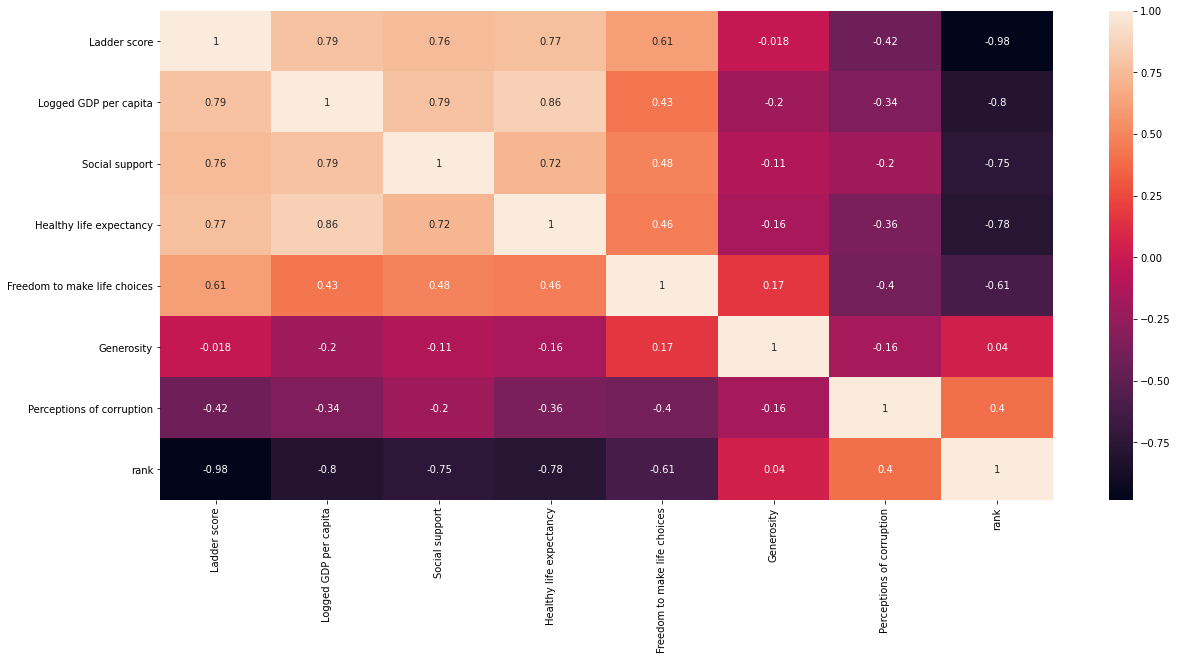

In [7]:
#Heatmap Korelasi 
#Apabila nilainya >0<1 maka berelasi positif dan warnanya semakin terang
#Apabila nilainya <0>-1 maka korelasinya negatif dan warnanya semakin gelap
#Apabila nilainya 0 atau mendekati 0 maka tidak memiliki korelasi antar variabel 
#Dengan heatmap kita bisa tau secara cepat dengan melihat warna warnanya
corr = df.corr()
f, ax = plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

Result of Heatmap Visualization
1. Heatmap give us quick information about correlation between columns. 
2. We can see what aspect that have strong positive relationship to influence the ladder score that is Logged GDP per capita, social support, Healthy life expectancy and freedom to make choice. If that aspect increase, so the ladder score will be increase and GDP is the most aspect that impactful to ladder score
3. Aspect that have negative relationship with ladder score is preceptions of corruption. It's mean that if index preceptions of corruptions decrease so ladder score will be incerase
4. Meanwhile aspect generocity have index correlation -0.018 that means there is weak or even no have relationship. 

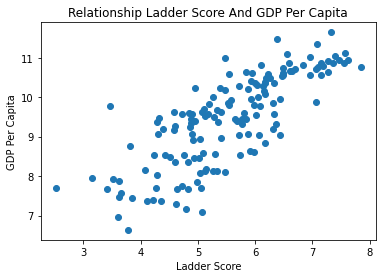

In [8]:
#Relationsiop the most significant aspect
plt.scatter(df['Ladder score'], df['Logged GDP per capita'])
plt.title('Relationship Ladder Score And GDP Per Capita')
plt.xlabel('Ladder Score')
plt.ylabel('GDP Per Capita')
plt.show()

In [9]:
df.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'rank'],
      dtype='object')

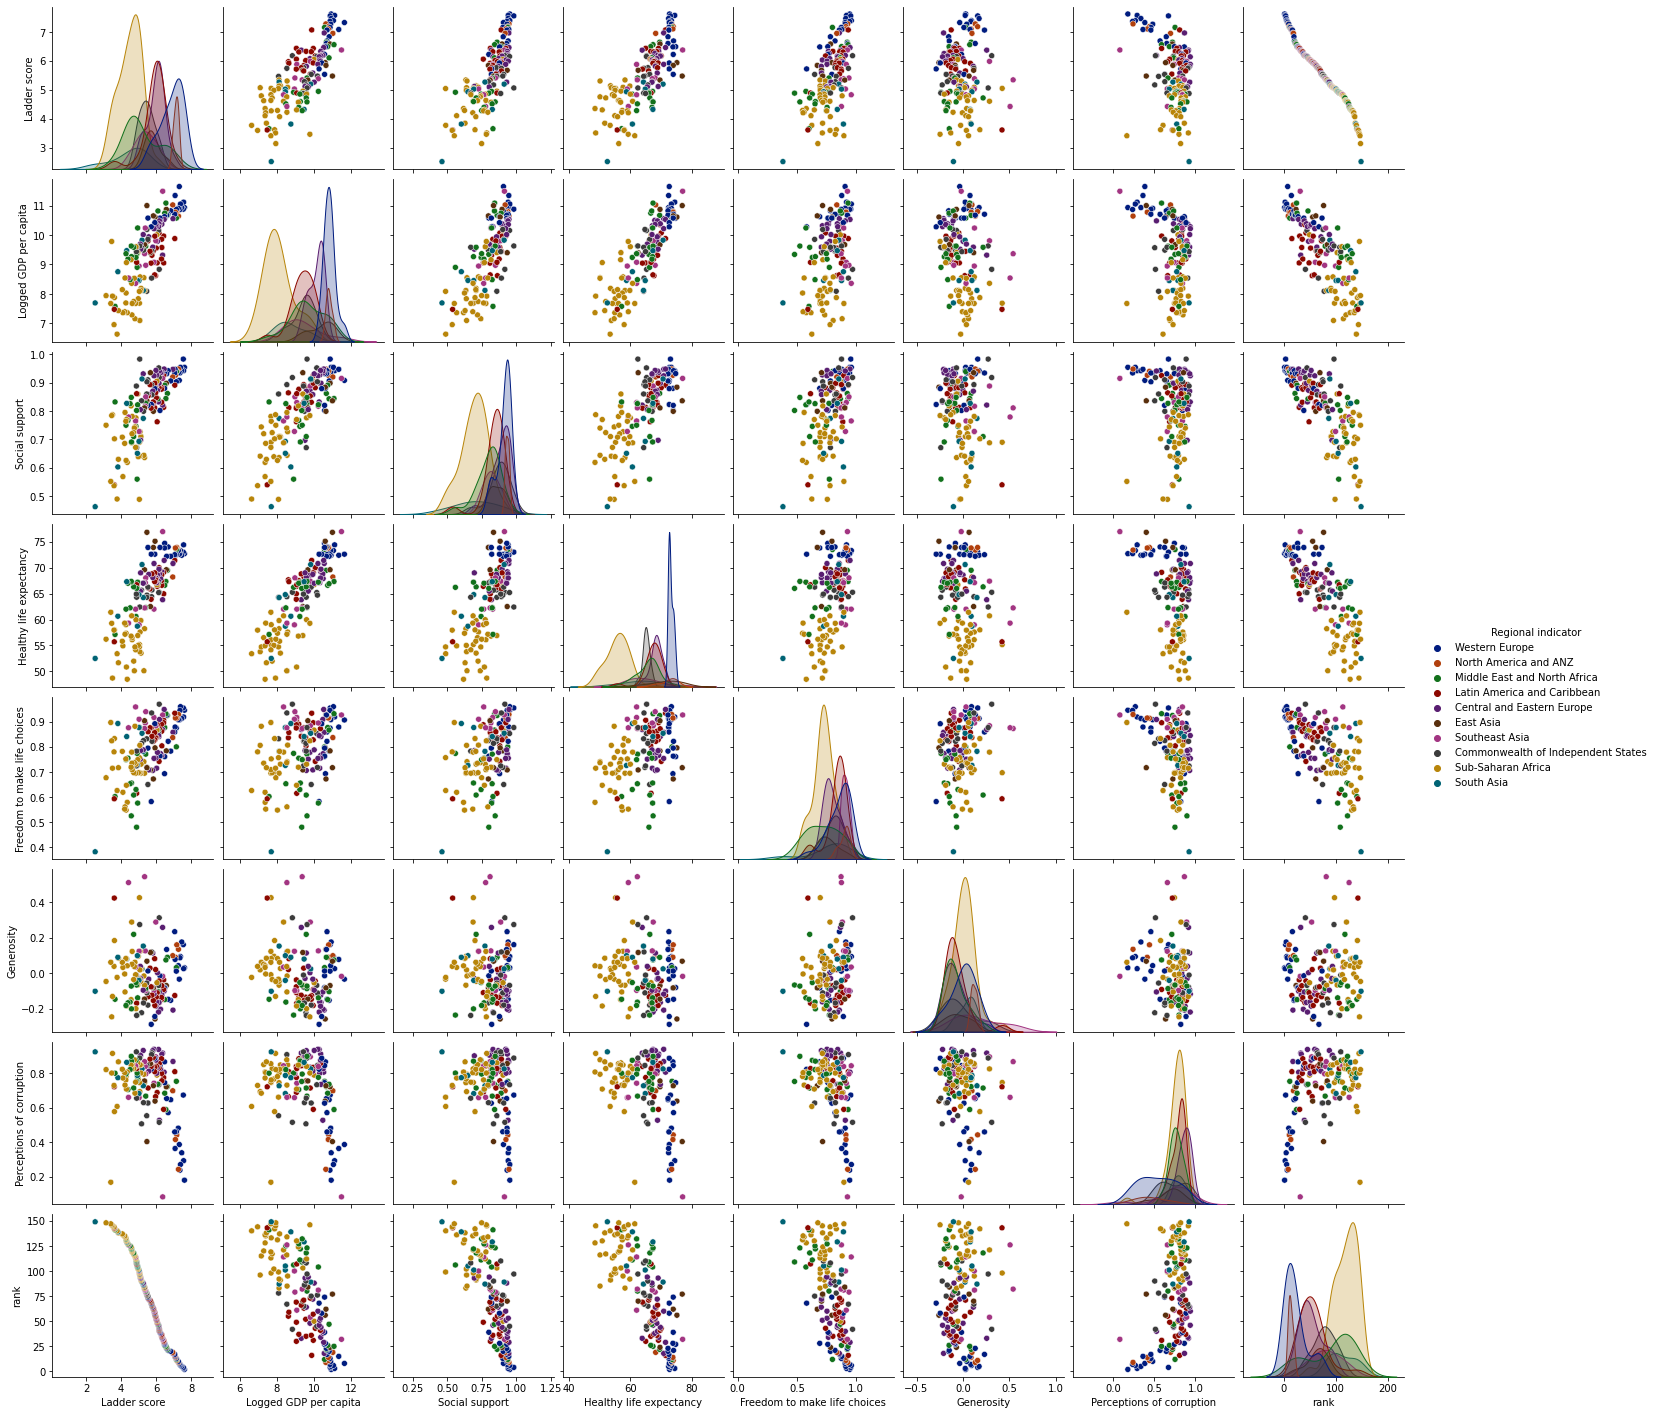

In [10]:
sns.pairplot(df.iloc[1:,1:],kind='scatter',hue='Regional indicator', palette='dark')

# **Analisis Data**

**Q1 : What is the highest and lowest country interms of ladder score happinest world?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[(0.0, 8.0)]

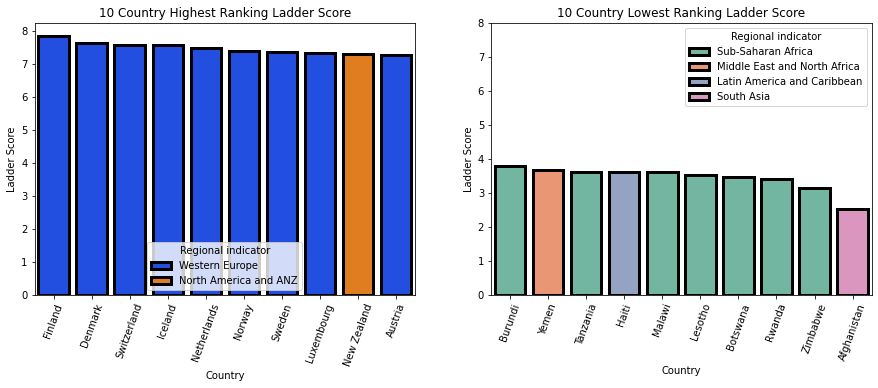

In [11]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
custom_palette = sns.color_palette("Set2", 9)

lowest = df.tail(10)
highest = df.head(10)

sns.barplot(highest['Country name'], highest['Ladder score'], data=highest, hue='Regional indicator', dodge=False, ax=ax[0], palette='bright',  ec='k', lw=3).set(title='10 Country Highest Ranking Ladder Score', xlabel='Country', ylabel='Ladder Score')
ax[0].set_xticklabels(fontsize=10, rotation=70, labels=highest['Country name'])

sns.barplot(lowest['Country name'], lowest['Ladder score'],data=lowest, hue='Regional indicator', dodge=False, ax=ax[1], palette=custom_palette, ec='k', lw=3).set(title='10 Country Lowest Ranking Ladder Score', xlabel='Country', ylabel='Ladder Score')
ax[1].set_xticklabels(fontsize=10, rotation=70, labels=lowest['Country name'])
ax[1].set(ylim=(0, 8))


1. The highest ladder score is finlandia, meanwhile the lowest is Afganishtan
2. Highest ladder score most from region western europe and the lowest most from sub saharan africa

**Q2 : How Indonesian ladder score  Amonng country In southeast asia?**

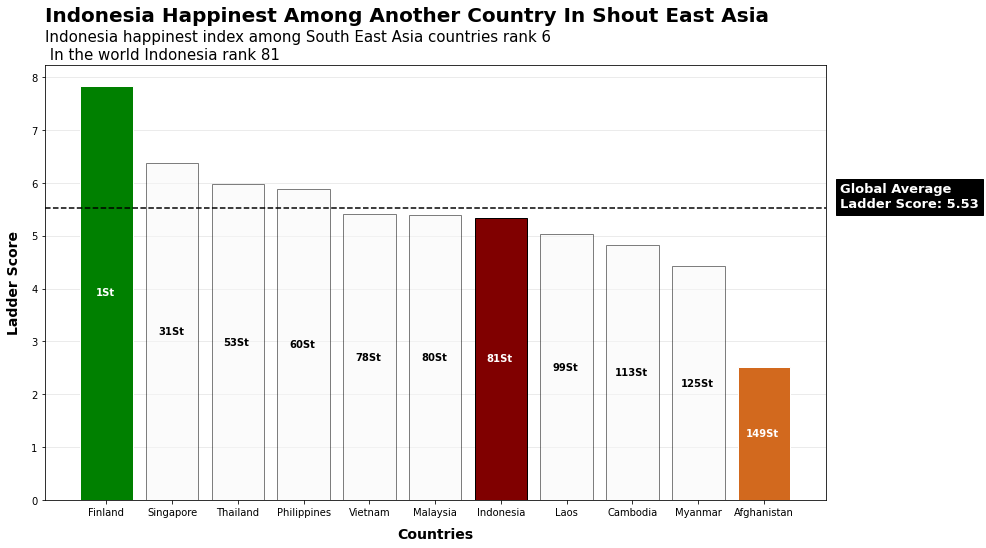

In [87]:
SEA = df.loc[df['Regional indicator'] == 'Southeast Asia']
top = highest.head(1)
bottom = lowest.tail(1)
global_mean = df['Ladder score'].mean()
index=list(SEA['rank']-1)

fig, ax = plt.subplots(figsize=(14,8))

bar0 = ax.bar(top['Country name'], top['Ladder score'], color='green', edgecolor='white')
bar1 = ax.bar(SEA['Country name'], SEA['Ladder score'], color='#F8F8F8', alpha=0.5, edgecolor='black')
bar2 = ax.bar(bottom['Country name'], bottom['Ladder score'], color='chocolate', edgecolor='white')
line = ax.axhline(global_mean, linestyle='--', color='black')

ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel('Countries', fontsize=14, labelpad=10, fontweight='bold')
ax.set_ylabel('Ladder Score', fontsize=14, labelpad=10, fontweight='bold')
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

avg = ax.text(
    s="Global Average \nLadder Score: {:.2F}".format(global_mean),
    x=xmax*1.02,
    y=global_mean,
    fontsize=13,
    fontweight='bold',
    backgroundcolor='black',
    color='white'
)

bar1[5].set_alpha(1)
bar1[5].set_color('maroon')
bar1[5].set_edgecolor('black')

for i, bar in enumerate(bar1):
  x=bar.get_x()
  y=bar.get_height()
  if i != 5:
    ax.text(
        s=f"{index[i]}St",
        x=x+0.38, y=y/2,
        va='center', ha='center', 
        color='black',
        fontweight='bold',
        fontsize=10
    )
  else:
    ax.text(
        s=f"{index[i]}St",
        x=x+0.38, y=y/2,
        va='center', ha='center', 
        color='white',
        fontweight='bold',
        fontsize=10
    )
  
for i, bar in enumerate(bar0):
  x=bar.get_x()
  y=bar.get_height()
  ax.text(
      s="1St",
      x=x+0.38, y=y/2,
      va='center', ha='center',
      fontsize=10,
      fontweight='bold',
      color='white'
  )

for i, bar in enumerate(bar2):
  x=bar.get_x()
  y=bar.get_height()
  ax.text(
      s="149St",
      x=x+0.38, y=y/2,
      color='white',
      fontsize=10,
      fontweight='bold',
      va='center', ha='center'
  )

  plt.text(s='Indonesia Happinest Among Another Country In Shout East Asia', fontsize=20, fontweight='bold', ha='left', x=xmin, y=ymax*1.1)
  plt.title('Indonesia happinest index among South East Asia countries rank 6 \n In the world Indonesia rank 81', fontsize=15, loc='left')
  plt.show()

**Q3 : Preception of Corruption Among Countries In South East Asia**

Text(0.0, 1.0, 'Indonesian preception of corruption still high and get rank 124st in the world\nBut among Southeast Asia, Indonesia rank 8 and Singapore get first position in the world')

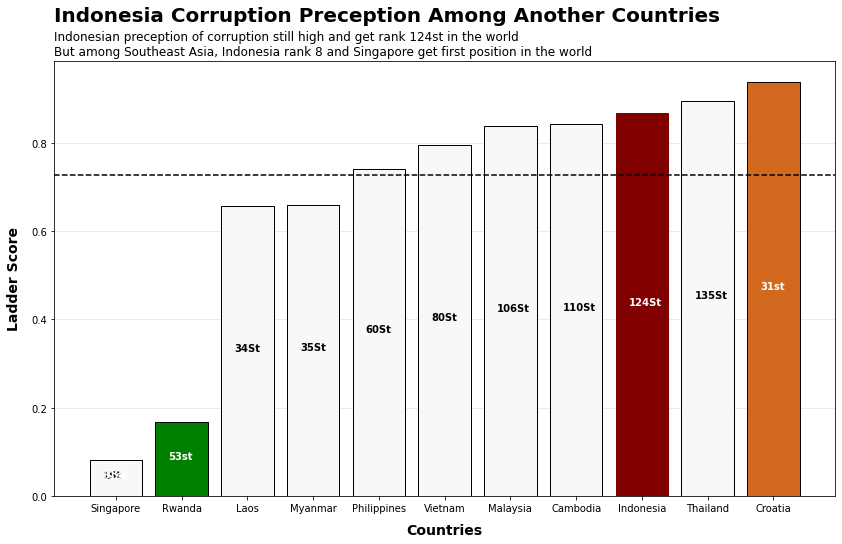

In [96]:
corup = df['Perceptions of corruption'].mean()
sort_df=df.sort_values(by=['Perceptions of corruption']).reset_index(drop=True)
top_corup=sort_df.head(2)
bottom_corup=sort_df.tail(1)
sort_corup_SEA = sort_df.loc[sort_df['Regional indicator'] == 'Southeast Asia']
index_SEA=list(sort_corup_SEA.index+1)

fig, ax=plt.subplots(figsize=(14,8))

bar0=ax.bar(top_corup['Country name'], top_corup['Perceptions of corruption'], color='green', edgecolor='black')
bar1=ax.bar(sort_corup_SEA['Country name'], sort_corup_SEA['Perceptions of corruption'], color='#F8F8F8', edgecolor='black')
bar2=ax.bar(bottom_corup['Country name'], bottom_corup['Perceptions of corruption'],color='chocolate', edgecolor='black')
line_cor = ax.axhline(corup, linestyle='--', color='black')

ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel('Countries', fontsize=14, labelpad=10, fontweight='bold')
ax.set_ylabel('Ladder Score', fontsize=14, labelpad=10, fontweight='bold')
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

bar1[7].set_color('maroon')

for i, bar in enumerate(bar1):
  x=bar.get_x()
  y=bar.get_height()
  if i != 7:
    ax.text(
        x=x+0.2,
        y=y/2,
        s=f"{index_SEA[i]}St",
        fontsize=10,
        fontweight='bold',
        color='black'
        )
  else:
     ax.text(
        x=x+0.2,
        y=y/2,
        s=f"{index_SEA[i]}St",
        fontsize=10,
        fontweight='bold',
        color='white'
    )

for i, bar in enumerate(bar0):
  x=bar.get_x()
  y=bar.get_height()
  ax.text(
      s=f'{index[i]}st',
      x=x+0.2,
      y=y/2,
      fontsize=10,
      fontweight='bold',
      color='white'
  )

for i, bar in enumerate(bar2):
  x=bar.get_x()
  y=bar.get_height()
  ax.text(
      s=f'{index[i]}st',
      x=x+0.2,
      y=y/2,
      fontsize=10,
      fontweight='bold',
      color='white'
  )

plt.text(s='Indonesia Corruption Preception Among Another Countries', x=xmin, y=ymax+0.09, fontsize=20, fontweight='bold')
plt.title('Indonesian preception of corruption still high and get rank 124st in the world\nBut among Southeast Asia, Indonesia rank 8 and Singapore get first position in the world', loc='left')



Preception of Corruption have a negative relationship, it means the higher rank of countries have the higher preception of corruption. 

**Q4 : How Indonesia Life Health Expectancy through Social Support and GDP among another south east asia countrie?**

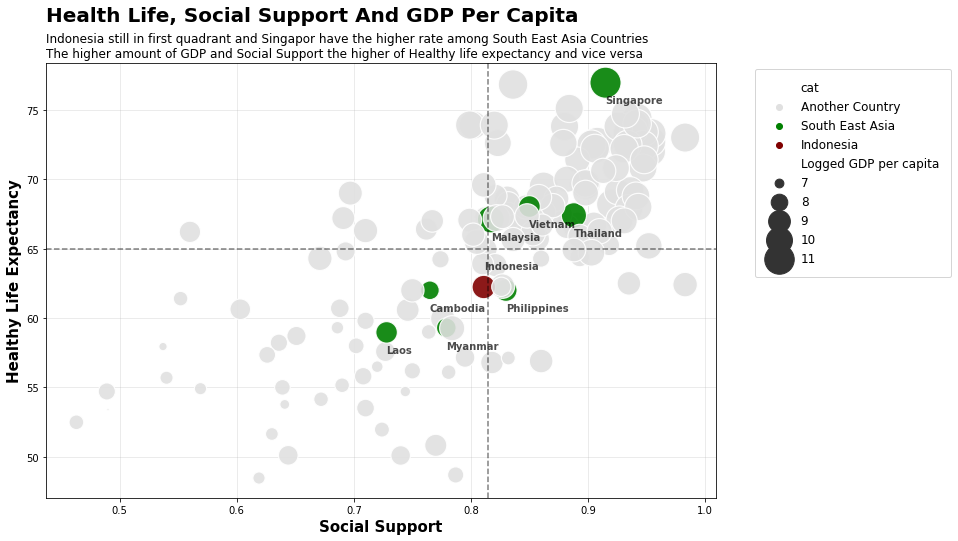

In [88]:
health_mean = df['Healthy life expectancy'].mean()
social_mean = df['Social support'].mean()
countries = df[df['Regional indicator'] == 'Southeast Asia']['Country name'].tolist()
df['cat'] = df.apply(lambda x :'South East Asia'if (x['Regional indicator'] == 'Southeast Asia' and x['Country name']!='Indonesia') else ('Indonesia' if x['Country name']=='Indonesia' else 'Another Country'), axis=1)


fig, ax = plt.subplots(figsize=(12,8))

ax.grid(alpha=0.3)
ax.set_axisbelow(True)
health_line = ax.axhline(health_mean, linestyle='--', color='black', alpha=0.5)
social_line = ax.axvline(social_mean, linestyle='--', color='black', alpha=0.5)
'Social support', 'Healthy life expectancy',

sns.scatterplot(
    y= 'Healthy life expectancy',
    x='Social support',
    data=df,
    hue='cat',
    size='Logged GDP per capita',
    ax=ax, sizes=(5, 1000),
    palette=['#E0E0E0', 'green', 'maroon'], 
    alpha=0.9,
)

for i in range(SEA.shape[0]):
  if SEA['Country name'].iloc[i] == 'Indonesia':
    ax.text(
      x=SEA['Social support'].iloc[i],
      y=SEA['Healthy life expectancy'].iloc[i] + 1.3,
      s=SEA['Country name'].iloc[i],
      fontsize=10,
      fontweight='bold',
      alpha=0.7)
  else:
    ax.text(
      x=SEA['Social support'].iloc[i],
      y=SEA['Healthy life expectancy'].iloc[i] - 1.5,
      s=SEA['Country name'].iloc[i],
      fontsize=10,
      fontweight='bold',
      alpha=0.7
  )

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

ax.legend(bbox_to_anchor=(1.05, 1), ncol=1, borderpad=1, frameon=True, fontsize=12)
plt.text(s='Health Life, Social Support And GDP Per Capita', x=xmin, y=ymax+3, fontsize=20, fontweight='bold')
plt.title('Indonesia still in first quadrant and Singapor have the higher rate among South East Asia Countries \nThe higher amount of GDP and Social Support the higher of Healthy life expectancy and vice versa', loc='left')
plt.xlabel('Social Support', fontsize=15, fontweight='bold')
plt.ylabel('Healthy Life Expectancy', fontsize=15, fontweight='bold')
plt.show()
